# Clustering Negara Berdasarkan Kesejahteraan

### Tujuan
Mengelompokkan negara-negara berdasarkan faktor sosial-ekonomi dan kesehatan yang mempengaruhi tingkat perkembangan keseluruhan suatu negara.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

***
## Data Gathering
***

In [2]:
data_main = pd.read_csv('../dataset/country-data.csv')
data_main.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Read the discription of each column names
data_discription  = pd.read_csv('../dataset/country-data-dictionary.csv')
for i in range(10):
    print((data_discription['Column Name'][i]).ljust(10), ' : ', data_discription.Description[i])

country     :  Name of the country
child_mort  :  Death of children under 5 years of age per 1000 live births
exports     :  Exports of goods and services per capita. Given as %age of the GDP per capita
health      :  Total health spending per capita. Given as %age of GDP per capita
imports     :  Imports of goods and services per capita. Given as %age of the GDP per capita
Income      :  Net income per person
Inflation   :  The measurement of the annual growth rate of the Total GDP
life_expec  :  The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer   :  The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp        :  The GDP per capita. Calculated as the Total GDP divided by the total population.


***
## Exploratory Data Analysis:
***

In [4]:
data_main.shape

(167, 10)

In [5]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Dataset ini terdiri dari 167 negara dan 9 fitur. Nama-nama negara terletak di kolom kesepuluh. Kolom 'country' tidak akan digunakan dalam EDA dan modeling.

In [6]:
data = data_main.drop(columns = 'country')

In [7]:
# Checking for null values
data.isnull().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

Data tidak memiliki nilai null dan semua kolomnya bersifat numerikal, tidak ada kolom bertipe kategorikal.

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Rata-rata Income, GDPP and Child mortality lebih tinggi dibandingkan persentil ke-50, yang mengindikasikan bahwa histogramnya sangat miring ke arah kanan.

Inflation memiliki rentang dari nilai negatif hingga nilai positif yang tinggi, yang mengindikasikan bahwa mungkin terdapat outlier yang jauh.

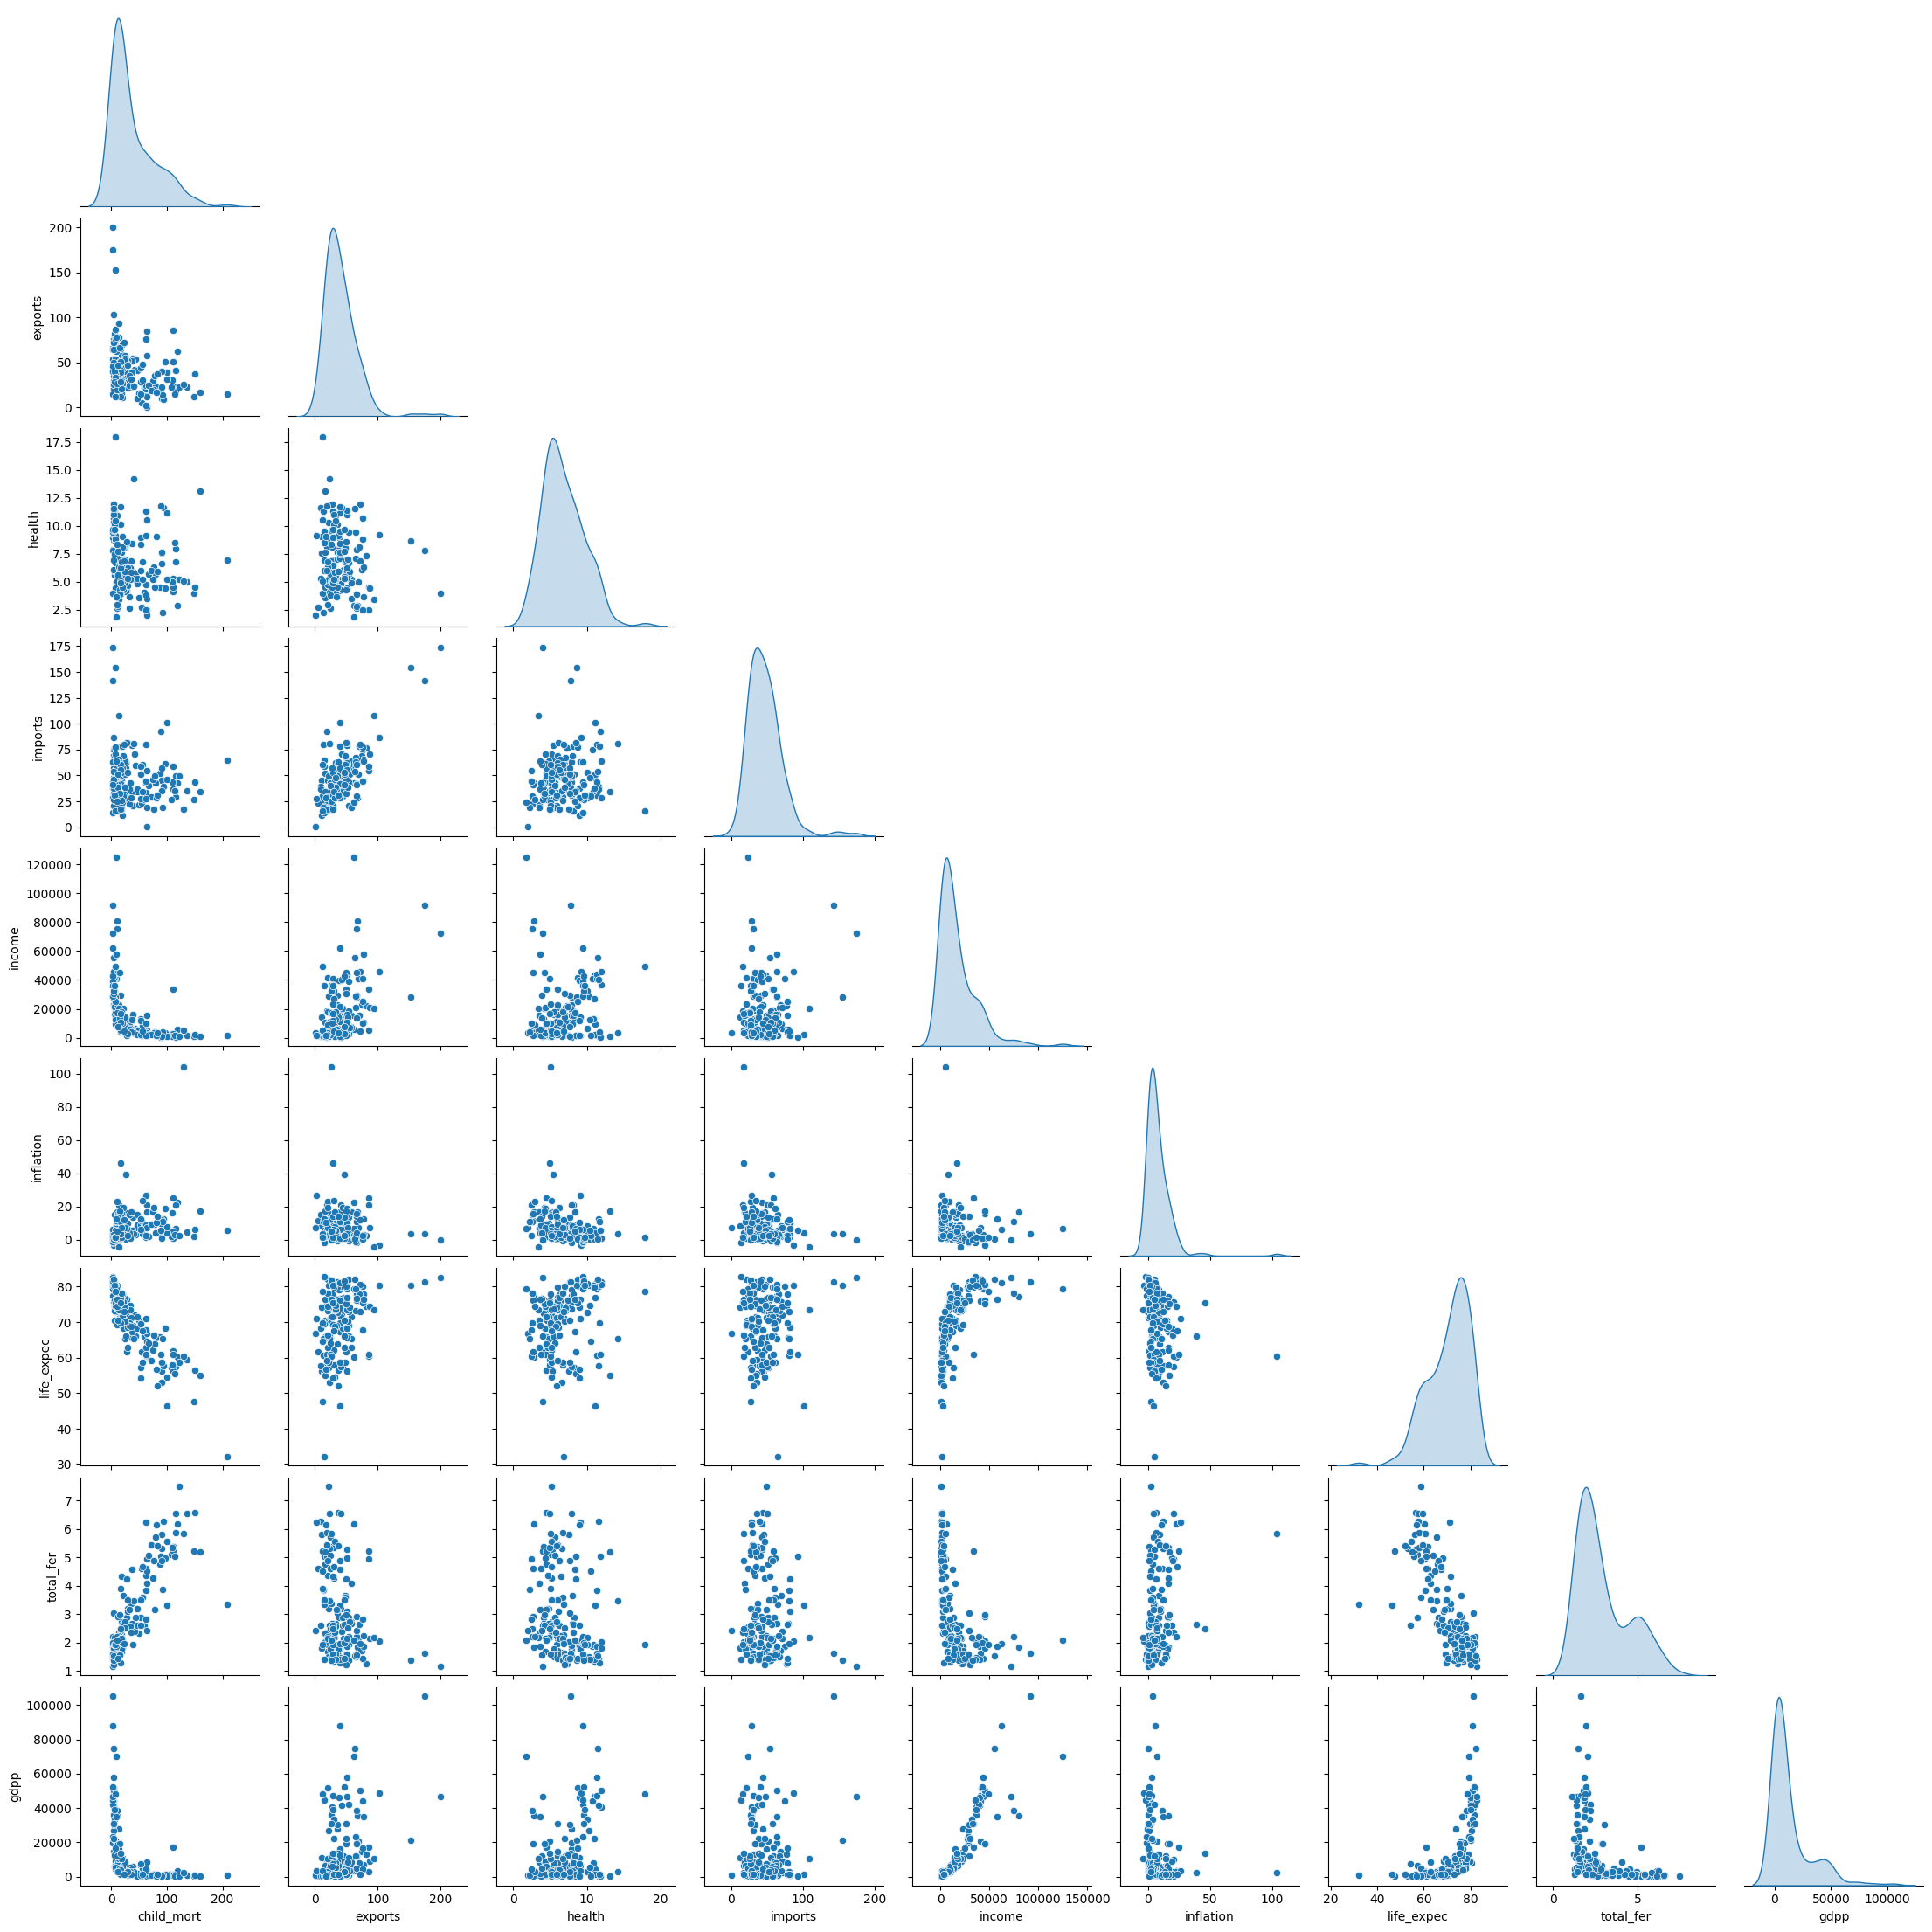

In [9]:
sns.pairplot(data, diag_kind = 'kde', corner = True)

#### Histogram:

- Sebagian besar data memiliki kemiringan ke ke kiri kecuali life expectancy yang juga miring ke kanan.

- GDPP dan total fertility menunjukkan dua puncak, yang mengindikasikan bahwa data ini dapat dikelompokkan menjadi minimal dua klaster.

- Semua plot menunjukkan adanya outlier.



#### Scatter Plot:

- Income dan GDPP terlihat memiliki korelasi yang tinggi.

- Negara dengan GDPP yang tinggi memiliki child mortality yang tinggi dan life expectancy yang tinggi serta inflasi yang rendah.

- Negara dengan Income yang tinggi memiliki child mortality yang juga rendah.

- Ada sedikit korelasi positif antara impor dan ekspor


<Axes: >

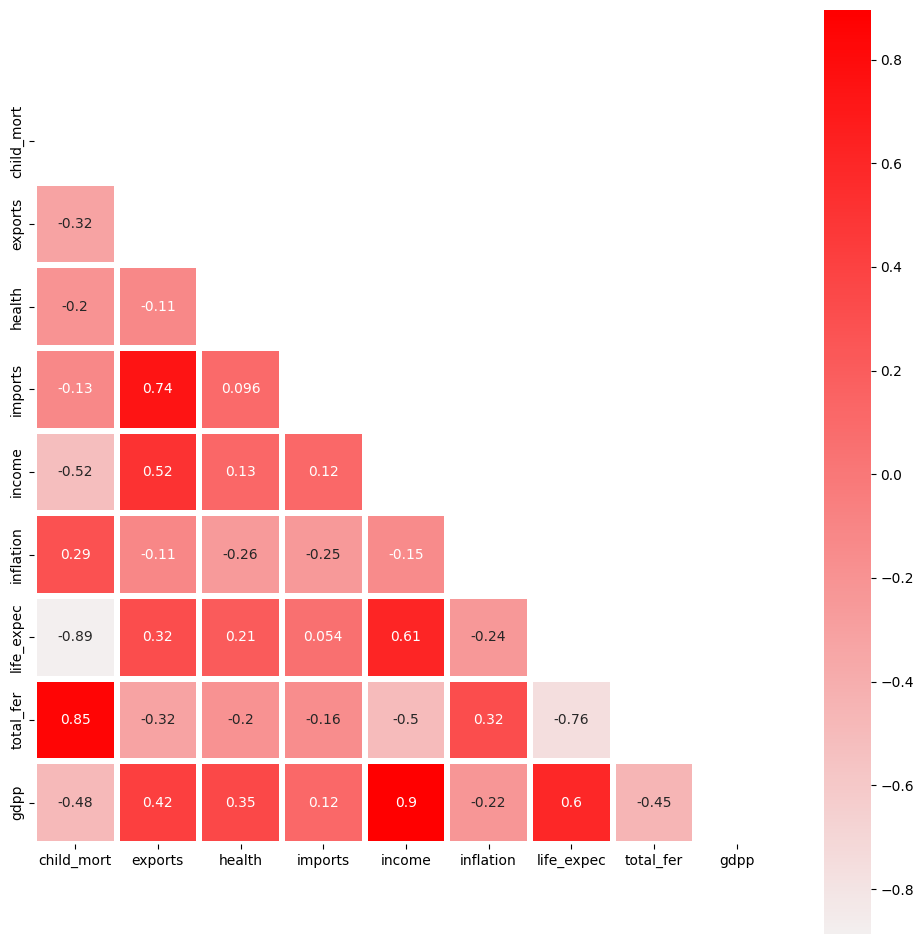

In [10]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.rcParams['figure.figsize'] = 12, 12
cmap = sns.light_palette('red', as_cmap = True)
sns.heatmap(corr, mask = mask, center = 0, cmap = cmap, square = True, annot = True, linewidth = 3)

- Impor dan ekspor memiliki korelasi positif yang tinggi (+0.74)

- Life Expectancy dan Child mortality memiliki korelasi negatif yang tinggi(-0.89)

- Total Fertility dan child mortality memiliki korelasi positif yang tinggi(+0.85)

- GDPP dan Income memiliki korelasi positif tertinggi (+0.9)

- Life Expectancy memiliki korelasi cukup kuat dengan Income (+0.61)

- GDPP memiliki korelasi yang cukup kuat dengan Life Expectancy (+0.6)

- Total Fertility memiliki korelasi negatif cukup tinggi dengan Life Expectancy (-0.76)

***
## Data Preprocessing
***
## Feature Engineering
### Scaling 

In [11]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
sData = pd.DataFrame(scale.fit_transform(data), columns = data.columns) # Scaled Data
sData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


<Axes: >

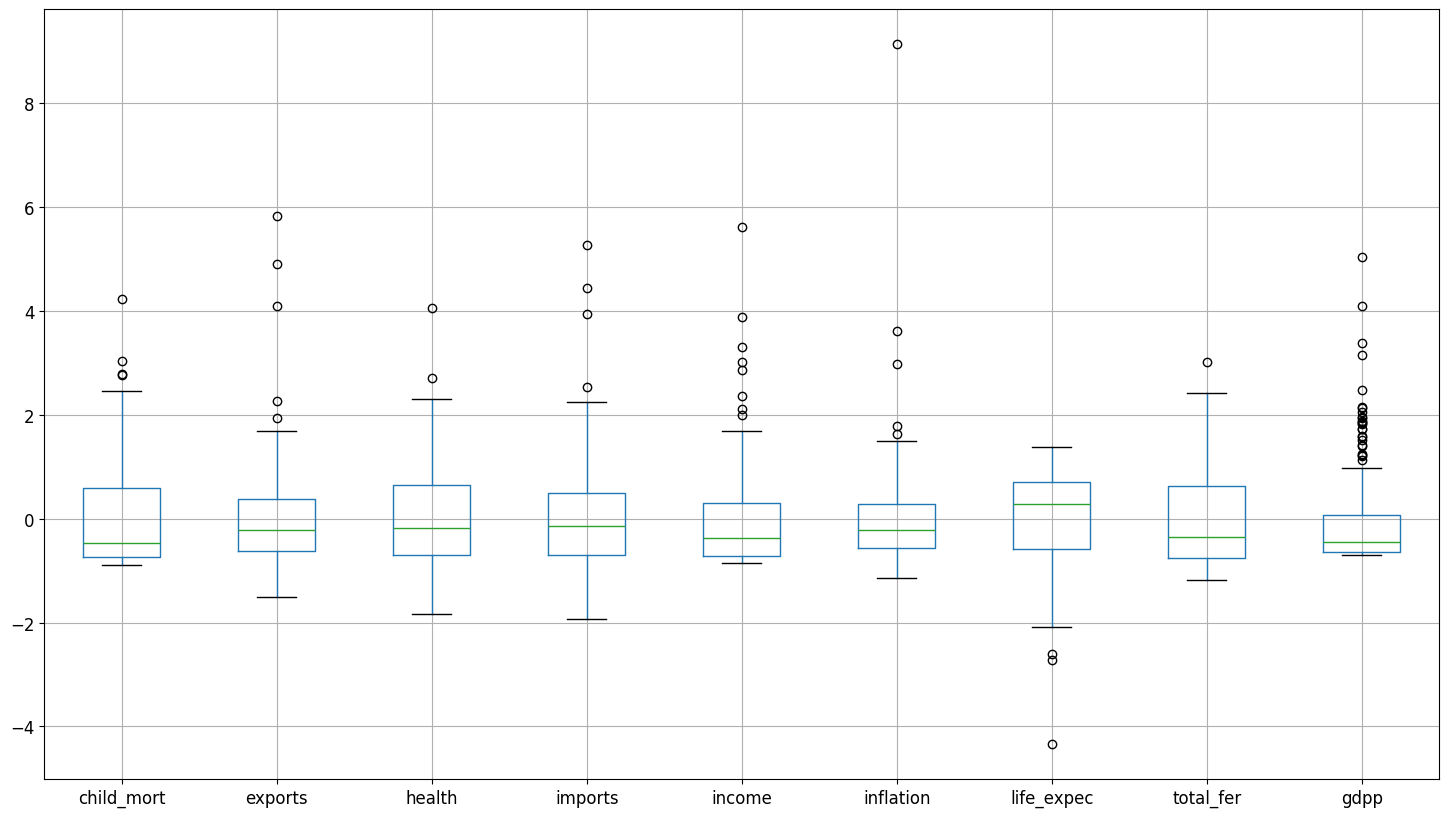

In [12]:
sData.boxplot(fontsize = 'large', figsize = (18, 10))

- Selain Life Expectancy, semua boxplot memiliki outlier hanya di atas.

- GDPP memiliki banyak outlier positif.

- Inflation memiliki sedikit outlier, tapi memiliki satu yang sangat tinggi sehingga mempengaruhi distribusi data.

### Principal Component Analysis (PCA)
PCA adalah metode statistik yang menyederhanakan informasi dalam tabel data besar dengan menggunakan sejumlah "summary indices" yang lebih kecil, yang dapat divisualisasikan dan dianalisis dengan lebih mudah.

#### PCA Scikit-Learn

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=9)
pcaData = pd.DataFrame(pca.fit_transform(sData))
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [15]:
# Explained variance
print("Explained variance:", pca.explained_variance_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance: [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]
Explained variance ratio: [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Memisahkan data menjadi train dan test untuk validasi
train_data, test_data = train_test_split(sData, test_size=0.2, random_state=42)


# Fit PCA pada data training
pca.fit(train_data)

# Transformasi data
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)

# Rekonstruksi data dari komponen utama
train_reconstructed = pca.inverse_transform(train_pca)
test_reconstructed = pca.inverse_transform(test_pca)

# Hitung error rekonstruksi
train_mse = mean_squared_error(train_data, train_reconstructed)
test_mse = mean_squared_error(test_data, test_reconstructed)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 7.042164287598363e-31
Test MSE: 7.6162977433095435e-31


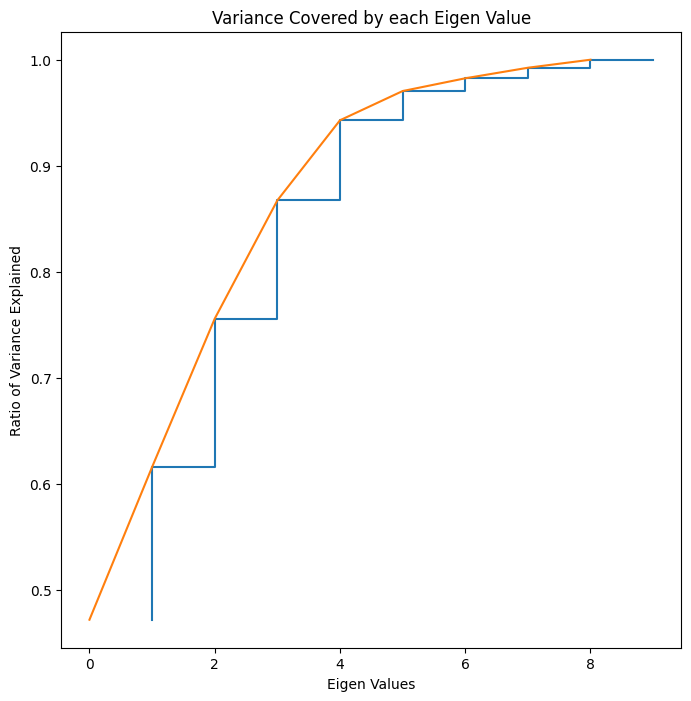

In [17]:
plt.rcParams['figure.figsize'] = 8, 8
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

#### PCA Manual

In [18]:
from unsupervised_learning.pca import PCAManual

In [19]:
pca_manual = PCAManual(n_components=9)
pcaManualData = pd.DataFrame(pca_manual.fit_transform(sData))
pca_manual.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [20]:
# Explained variance
print("Explained variance:", pca_manual.explained_variance_)
print("Explained variance ratio:", pca_manual.explained_variance_ratio_)

Explained variance: [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]
Explained variance ratio: [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [21]:
# Fit dan transform data pelatihan
train_pca_manual = pca_manual.fit_transform(train_data)

# Transform data pengujian
test_pca_manual = pca_manual.transform(test_data)

# Rekonstruksi data dari komponen utama
train_reconstructed_manual = pca_manual.inverse_transform(train_pca_manual)
test_reconstructed_manual = pca_manual.inverse_transform(test_pca_manual)

train_mse_manual = mean_squared_error(train_data, train_reconstructed_manual)
test_mse_manual = mean_squared_error(test_data, test_reconstructed_manual)

print(f'Train MSE: {train_mse_manual}')
print(f'Test MSE: {test_mse_manual}')

Train MSE: 1.0824823613887842e-30
Test MSE: 1.386787100788966e-30


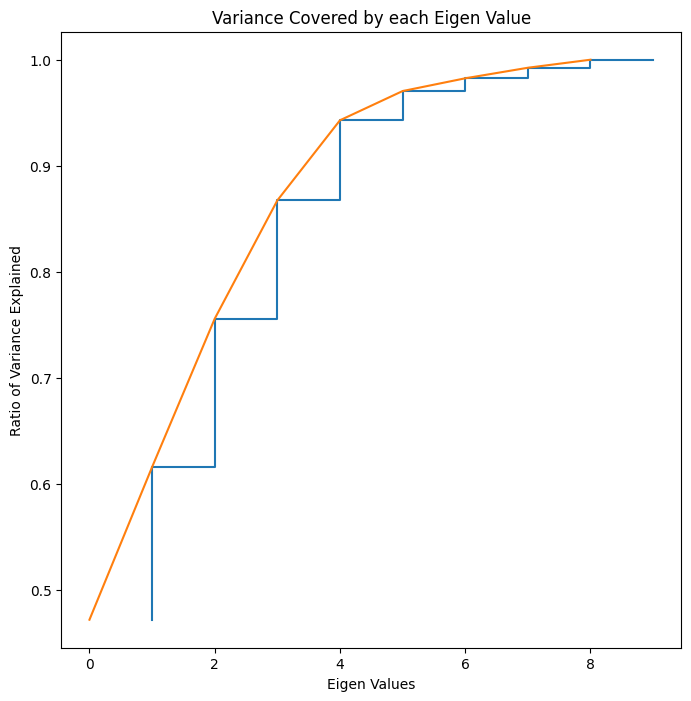

In [22]:
plt.rcParams['figure.figsize'] = 8, 8
plt.step(list(range(1,10)), np.cumsum(pca_manual.explained_variance_ratio_))
plt.plot(np.cumsum(pca_manual.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Setelah Nilai Eigen ke-4, cakupan varians mulai berkurang. Nilai-nilai ini mencakup lebih dari 90% dari total varians, sehingga kita akan menggunakan 4 nilai ini untuk langkah selanjutnya.

In [23]:
pcaData.drop(columns = [4,5,6,7,8], inplace = True)
pcaData.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


### KMeans Clustering

#### Mencari banyak klaster optimal menggunakan metode Elbow: 

Metode Elbow pada Data PCA:

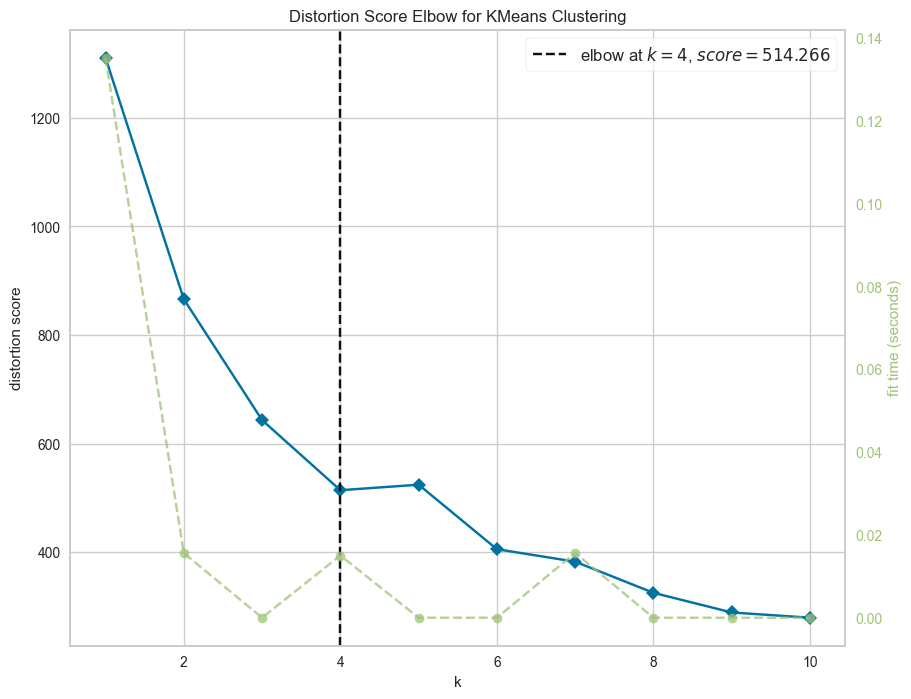

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(pcaData)
visualizer.poof()

Metode Elbow pada data yang sudah di-scaling:

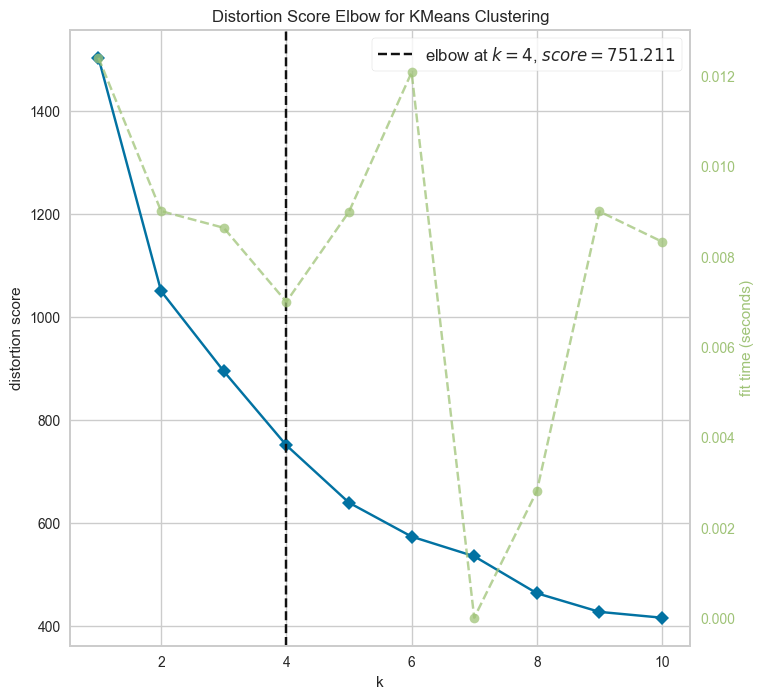

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(sData)
visualizer.poof()

Dengan menggunakan metode Elbow pada kedua dataset (PCA dan ter-scaling) kita bisa melihat bahwa banyak klaster optimalnya adalah 4

### Mencari jumlah optimal klaster menggunakan Silhoutte Score:
Semakin tinggi nilainya semakin bagus. Nilai bernilai di rentang -1 sampai 1

    
Silhouette Score menggunakan data PCA

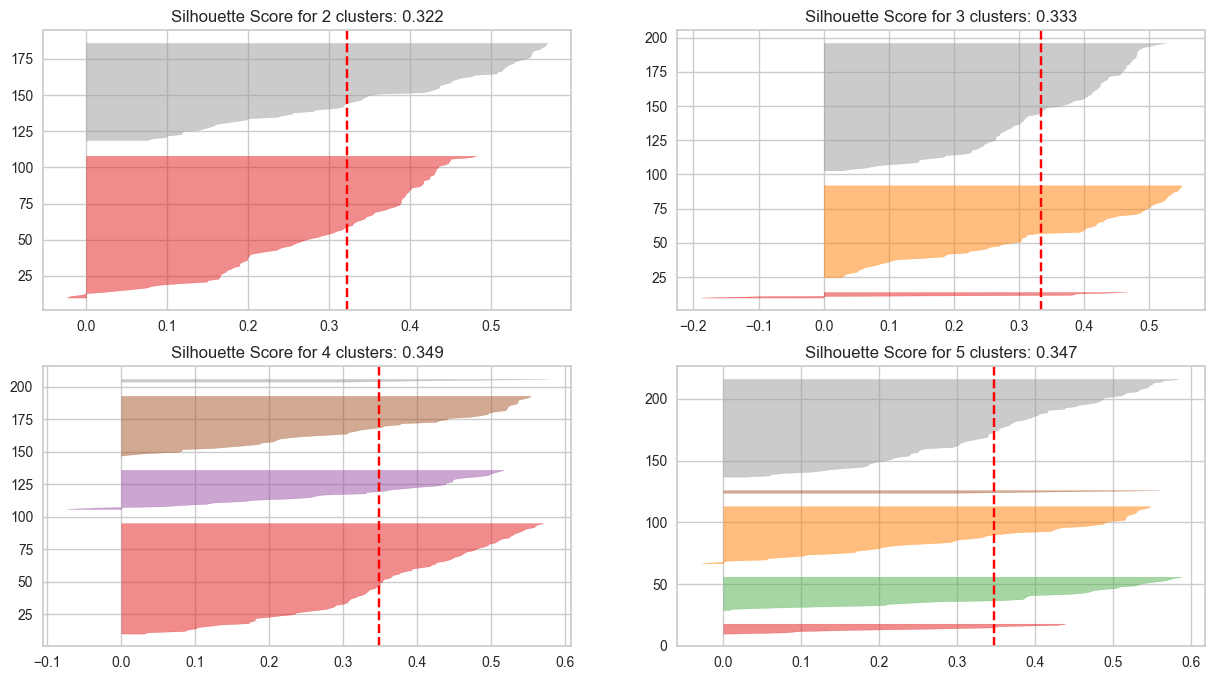

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(pcaData)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(pcaData, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)
#   silViz.poof()

Silhouette Score menggunakan data yang telah di-scaling:

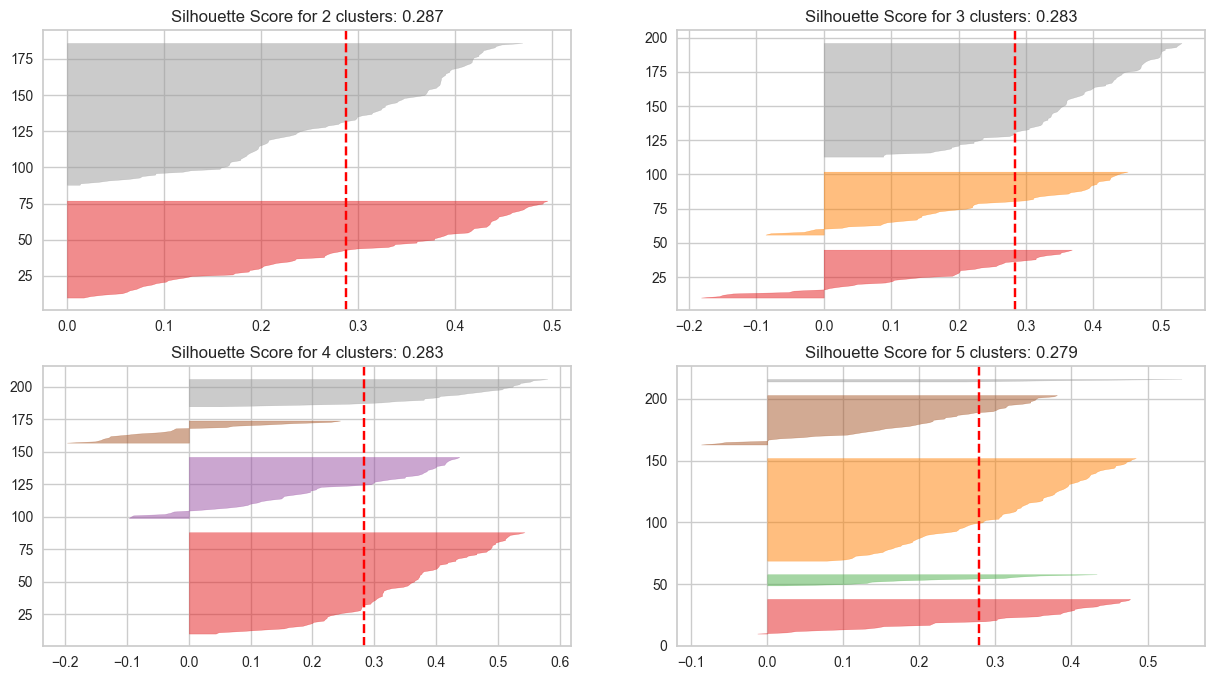

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(sData)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(sData, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)

Dengan menggunakan Silhouette Score pada kedua dataset (PCA dan ter-scaling) kita bisa melihat bahwa banyak klaster optimalnya adalah 4

***
## Modeling
***

### K-Means

#### K-Means Scikit Learn

In [28]:
# K-Means dengan data PCA
modelKM = KMeans(n_clusters = 4)
modelKM.fit(pcaData)
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
1     73    43.71
2     49    29.34
0     33    19.76
3     12     7.19


In [29]:
# K-Means dengan data ter-scale
modelKM = KMeans(n_clusters = 4)
modelKM.fit(sData)
sPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : sPredKM.value_counts(), 
    "Percent" : round(sPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
2     57    34.13
1     46    27.54
3     34    20.36
0     30    17.96


#### K-Means Manual

In [30]:
from unsupervised_learning.kmeans import KMeansManual

In [31]:
# K-Means manual dengan data PCA
modelKMManual = KMeansManual(n_clusters=4, init='k-means++')
modelKMManual.fit(pcaData)
pcaPredKMManual = pd.Series(modelKMManual.labels_)
print(pd.concat({
    "count" : pcaPredKMManual.value_counts(), 
    "Percent" : round(pcaPredKMManual.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
0     66    39.52
2     42    25.15
1     32    19.16
3     27    16.17


In [32]:
# K-Means manual dengan data ter-scale
modelKMManual = KMeansManual(n_clusters=4, init='k-means++')
modelKMManual.fit(sData)
sPredKMManual = pd.Series(modelKMManual.labels_)
print(pd.concat({
    "count" : sPredKMManual.value_counts(), 
    "Percent" : round(sPredKMManual.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
1     82    49.10
0     46    27.54
2     36    21.56
3      3     1.80


- Klaster yang terbentuk berukuran sama untuk kedua data (PCA dan Scaled)
- Grup terbesar mengcover lebih dari 50% negara di dalam dataset.

### Visualisasi klaster berdasarkan fitur dengan data asli:

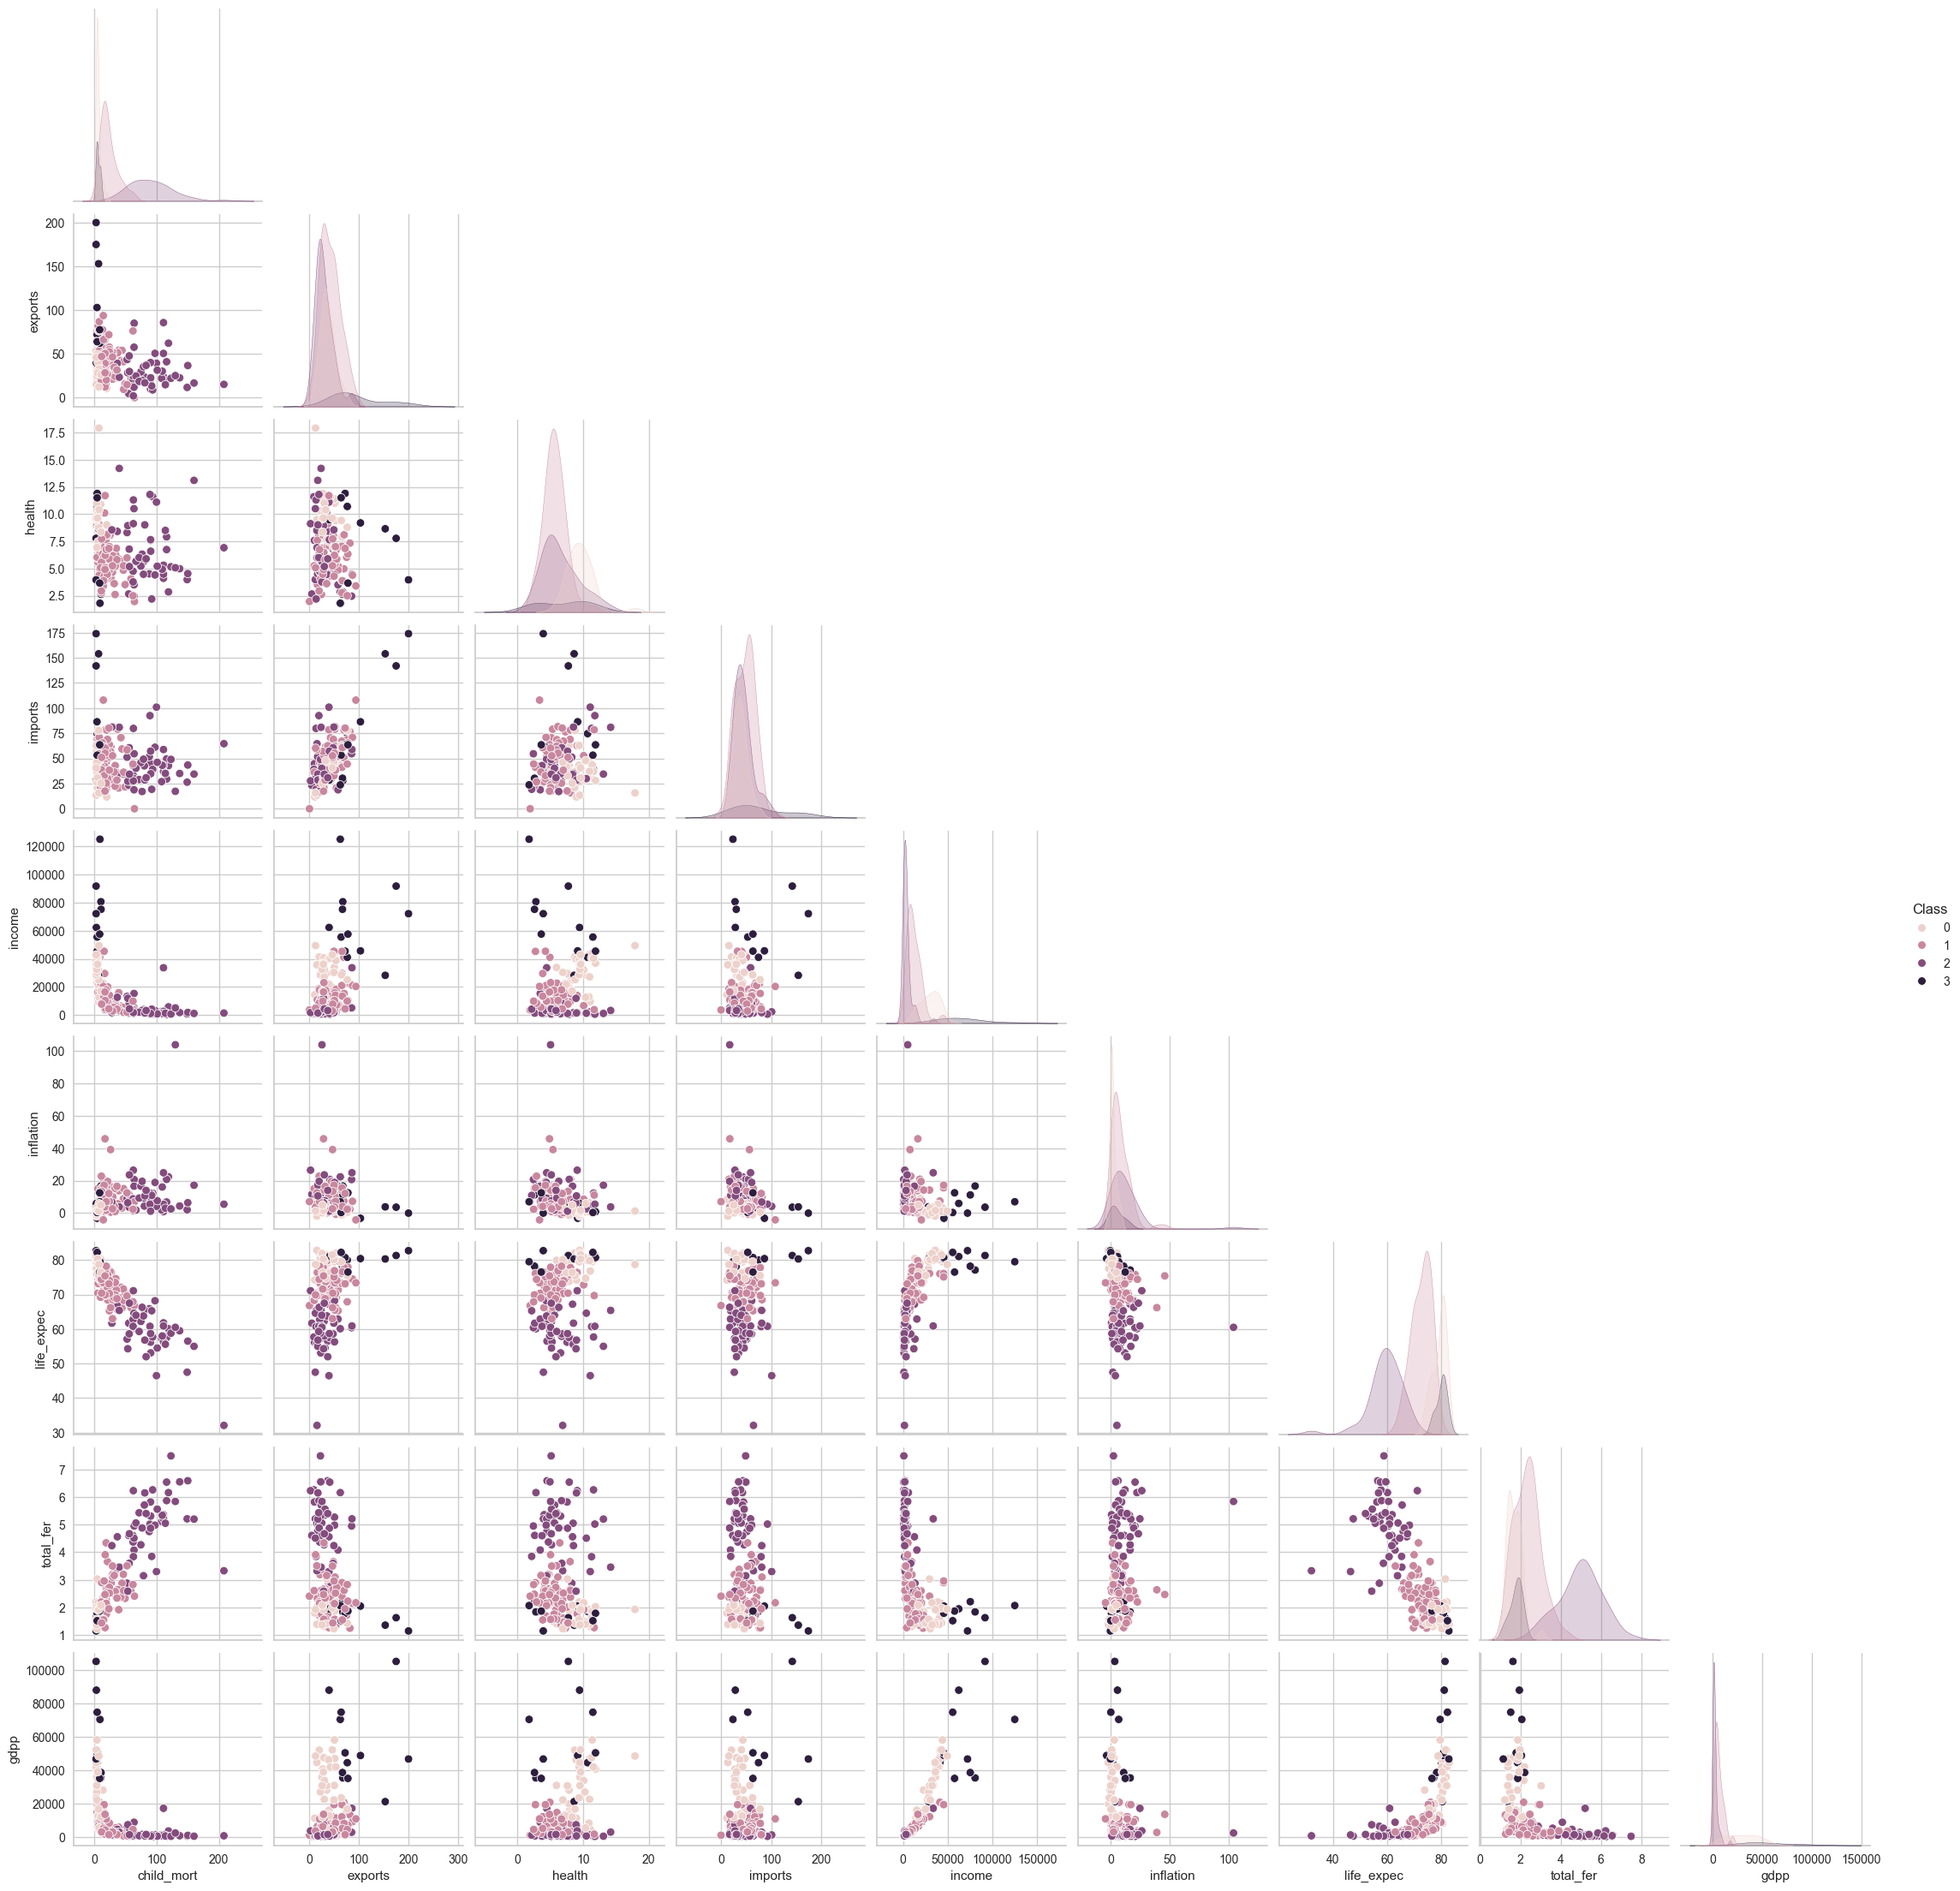

In [33]:
dataKM = data.copy()
dataKM['Class'] = pcaPredKM
sns.pairplot(dataKM, hue = "Class", corner = True)

Pada plot ini, terdapat banyak tumpang tindih antara Class-2 (86 negara) dan Class-3 (30 negara). Sebaliknya, Class-1 (3 negara) terlihat jelas berbeda di banyak plot.

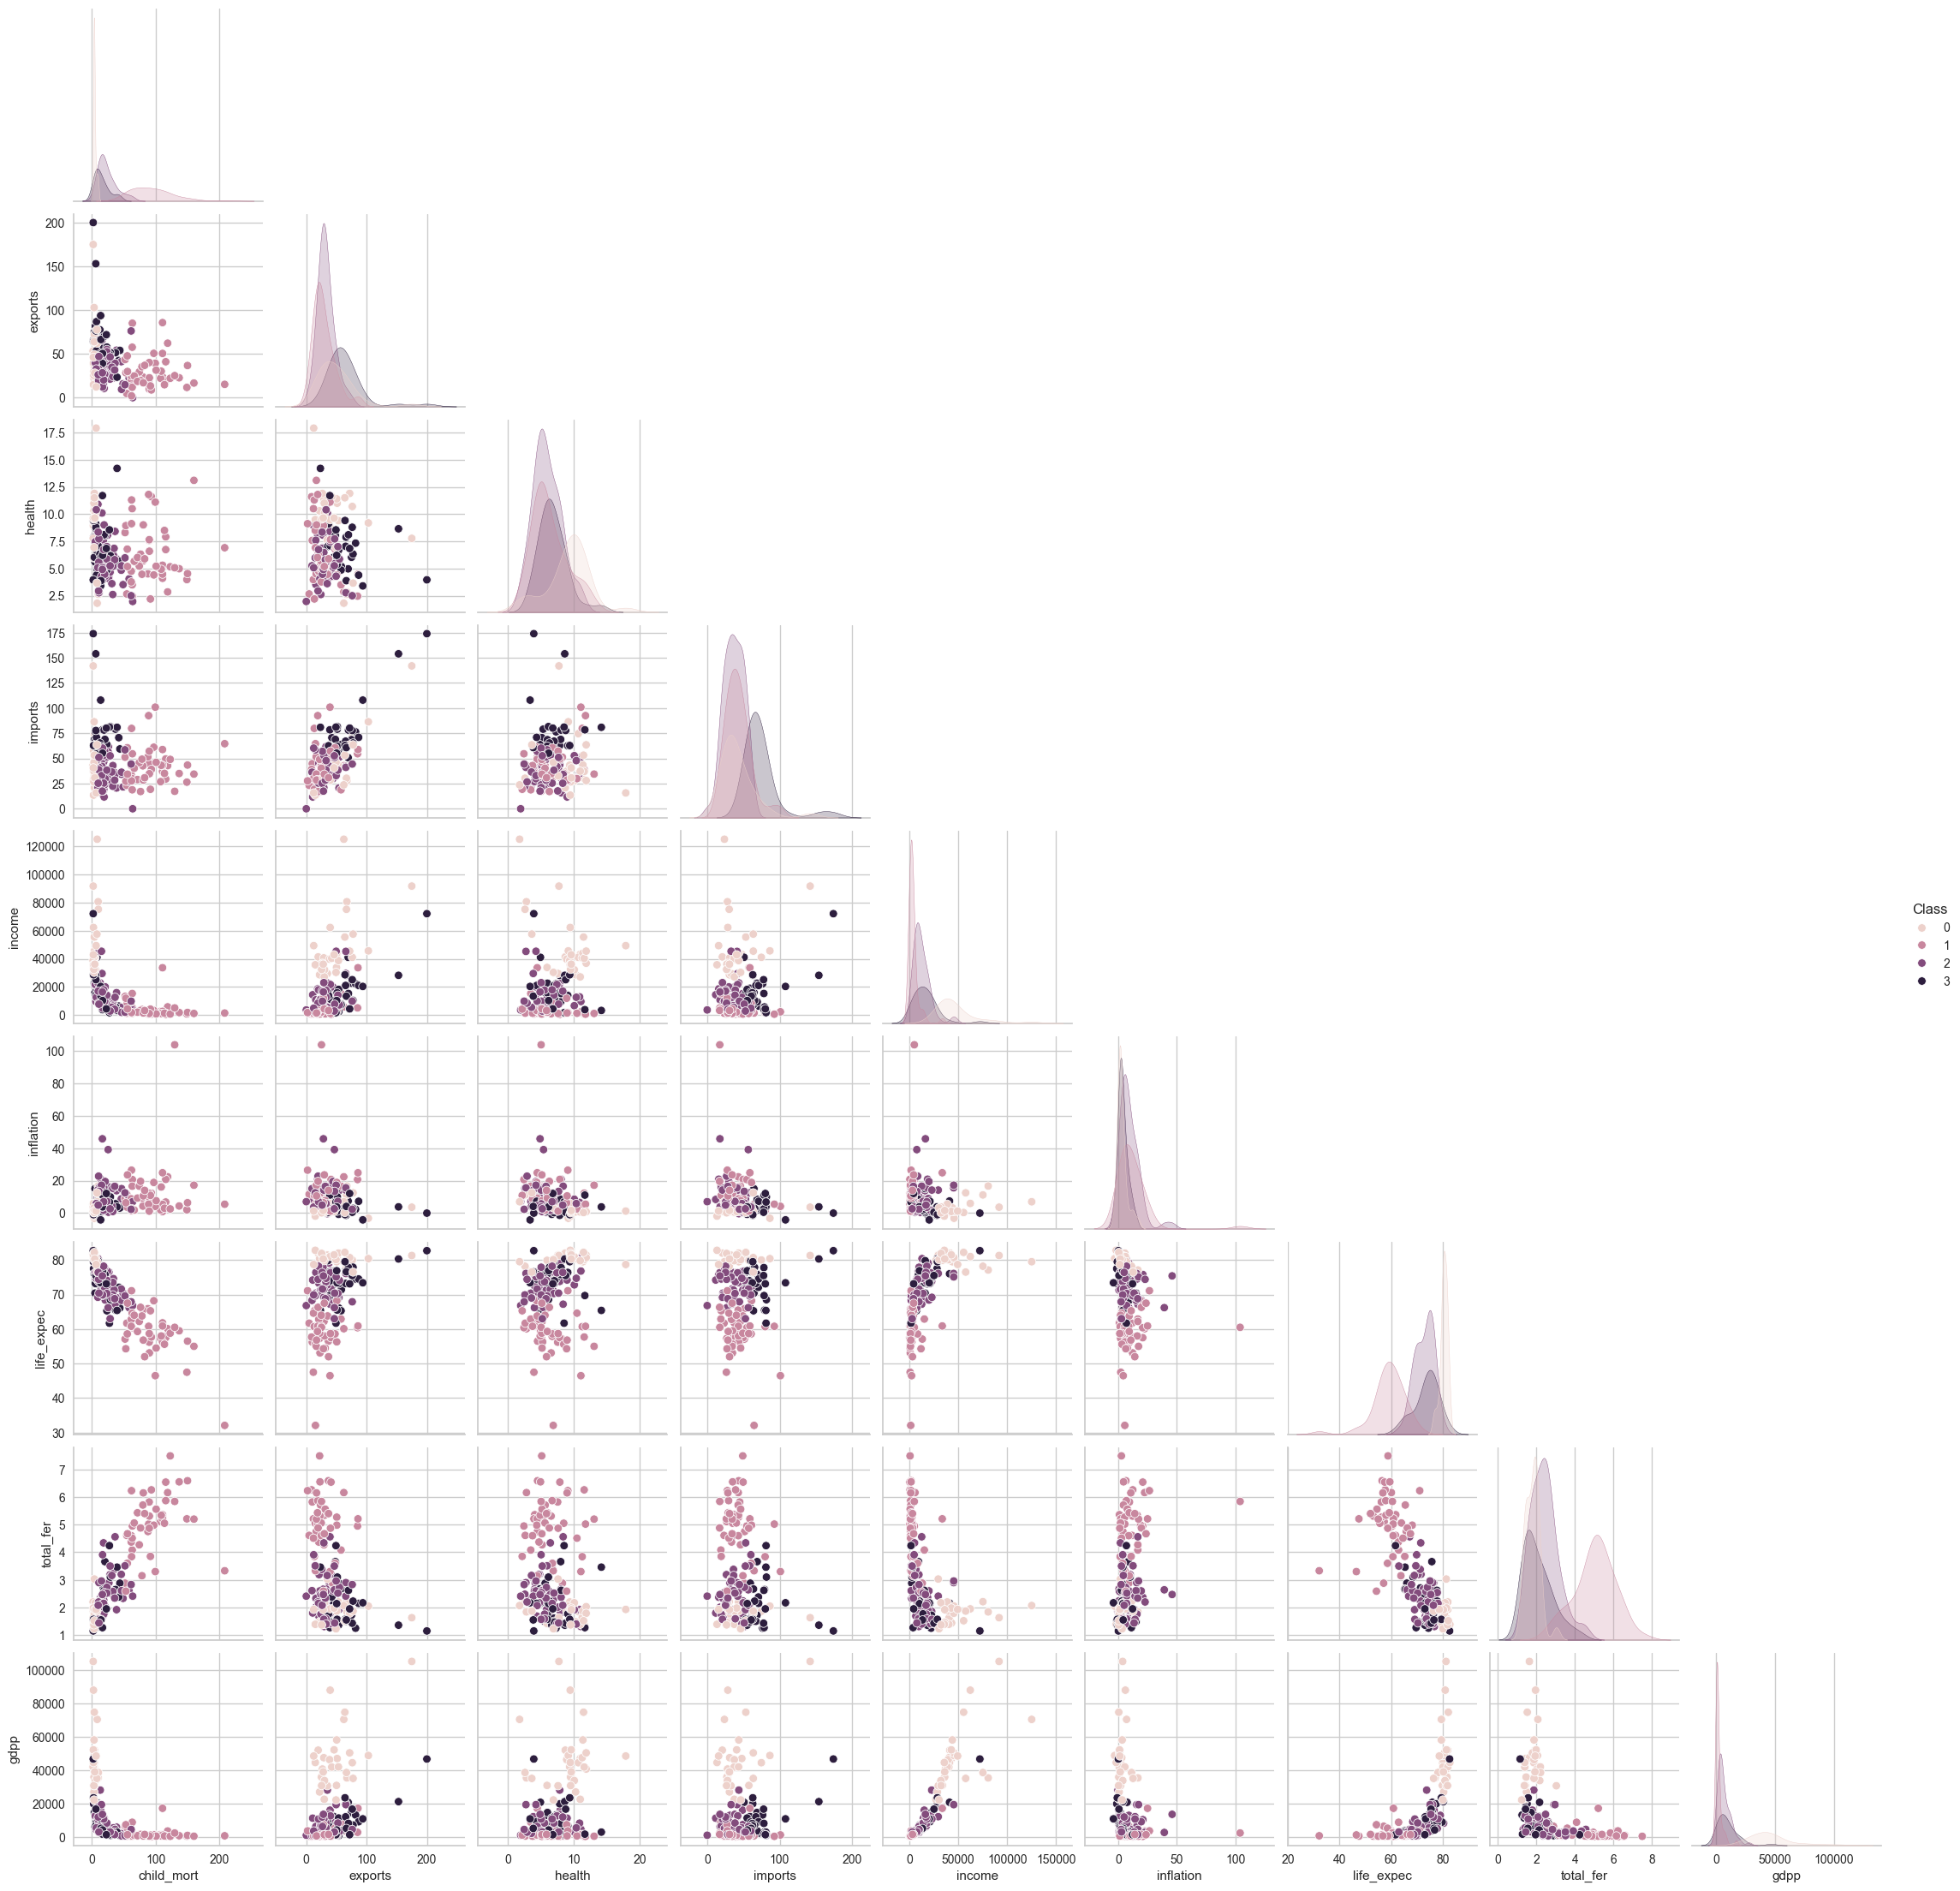

In [34]:
dataKM['Class'] = sPredKM
sns.pairplot(dataKM, hue = "Class", corner = True)

Pada plot ini, terdapat banyak tumpang tindih antara Class-0 (88 negara) dan Class-3 (30 negara). Sebaliknya, Class-2 (3 negara) terlihat jelas berbeda di banyak plot.

***
### DBSCAN Clustering
***


#### Nilai optimal untuk Epsilon:

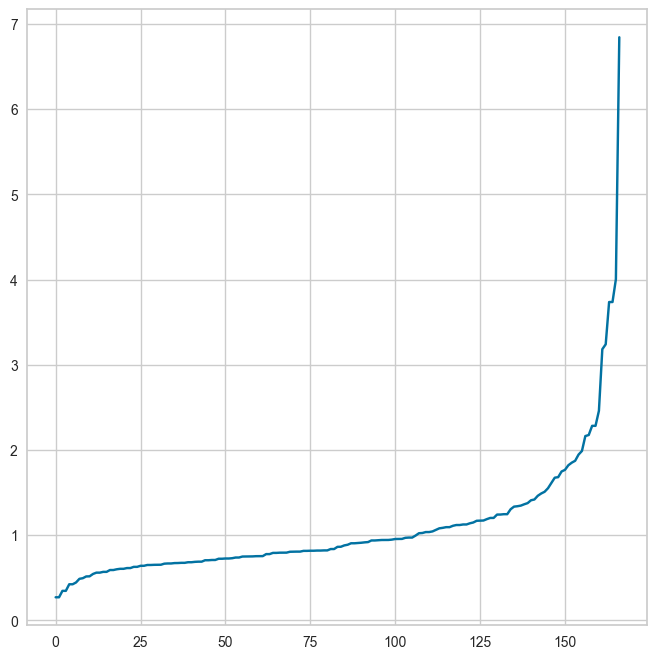

In [35]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(sData)
distances, indices = nbrs.kneighbors(sData)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 8,8
plt.plot(distances)

#### Nilai Epsilon yang optimal adalah 1.3, karena pada titik ini terbentuk pola seperti siku.

#### DBSCAN Scikit Learn

In [36]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 1.3, min_samples = 8)# minimum samples is set to 8
db.fit(sData)
sPredDB = pd.Series(db.labels_)
print(pd.concat({'count' : sPredDB.value_counts(), 
                 'percent' : round(sPredDB.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

    count  percent
 0     76    45.51
-1     53    31.74
 2     20    11.98
 1     18    10.78


#### DBSCAN Manual

In [37]:
from unsupervised_learning.dbscan import DBSCANManual

dbManual = DBSCANManual(eps=1.3, min_samples=8, metric='euclidean')# minimum samples is set to 8
dbManual.fit(sData)
sPredDBManual = pd.Series(dbManual.labels_)
print(pd.concat({'count' : sPredDBManual.value_counts(), 
                 'percent' : round(sPredDBManual.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

      count  percent
 1.0     76    45.51
-1.0     53    31.74
 3.0     20    11.98
 2.0     18    10.78


#### Dihasilkan 3 klaster, yaitu 0, 1, dan 2. Negara-negara yang memiliki nilai -1 merupakan titik yang noisy dan tidak tergolong dalam klaster apapun.

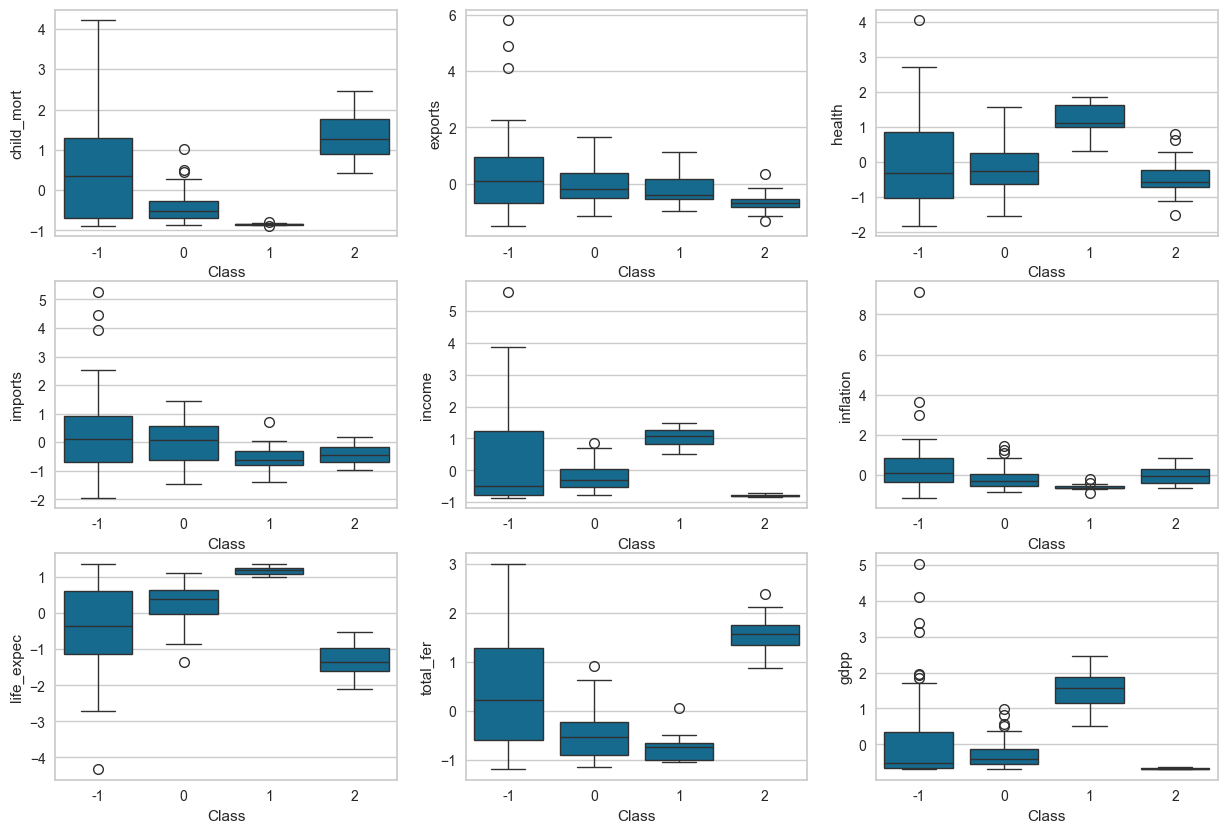

In [38]:
sDataDB = sData.copy()
sDataDB['Class'] = sPredDB

fig, (ax1,ax2,ax3) = plt.subplots(3, 3, figsize = (15, 10))
ax = [ax1, ax2, ax3]
j, k = 0, 0 
for i in sDataDB.drop(columns = "Class").columns:
    sns.boxplot(x = "Class", y = i, data = sDataDB, ax = ax[j][k])
    if divmod(k,2) == (1,0): 
        j += 1
        k = 0
    else: k += 1
plt.show()

***
## Evaluating
***

### K-Means Clustering Scores:

In [39]:
print('K-Means Scikit Learn Silhouette Score:', '%.2f'%sil_score(sData, sPredKM))
print('K-Means Manual Silhouette Score:', '%.2f'%sil_score(sData, sPredKMManual))

K-Means Scikit Learn Silhouette Score: 0.22
K-Means Manual Silhouette Score: 0.29


##### K-Means Clustering memberikan nilai Silhouette Score yang bagus, yaitu sekitar 0.3

### DBSCAN Scores:

In [40]:
print('DBSCAN Sckit Learn Silhouette Score:', '%.2f'%sil_score(sData, sPredDB))
print('DBSCAN Manual Silhouette Score:', '%.2f'%sil_score(sData, sPredDBManual))

DBSCAN Sckit Learn Silhouette Score: 0.13
DBSCAN Manual Silhouette Score: 0.13


##### DBSCAN memberikan nilai Silhouette Score yang kecil, yang menandakan clusteringnya kurang optimal

##### Karena K-Means lebih bagus performanya, maka hasil clustering model K-Means akan digunakan untuk visualisasi bentuk grafis (tidak termasuk komponen penilaian)

### Analisis Klaster

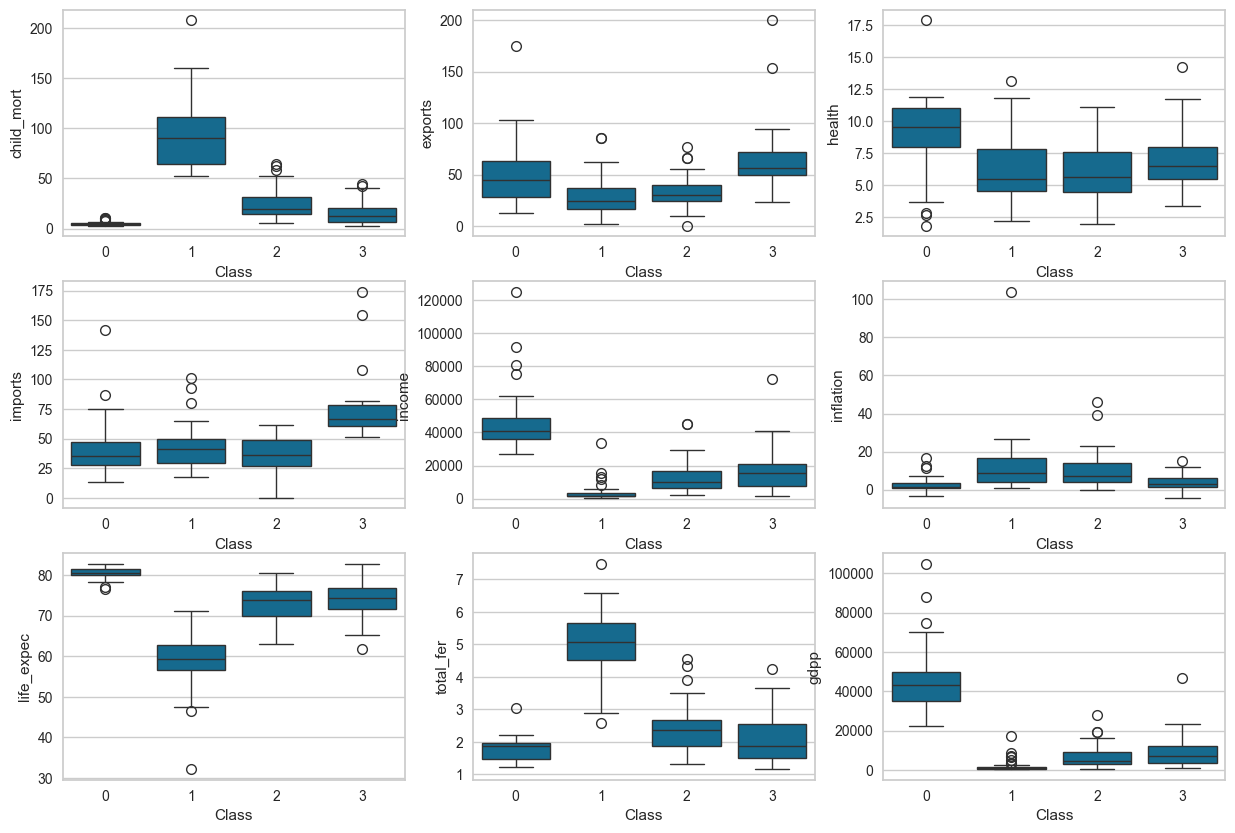

In [41]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 3, figsize = (15, 10))
ax = [ax1, ax2, ax3]
j, k = 0, 0 
for i in dataKM.drop(columns = "Class").columns:
    sns.boxplot(x = "Class", y = i, data = dataKM, ax = ax[j][k])
    if divmod(k,2) == (1,0): 
        j += 1
        k = 0
    else: k += 1
plt.show()

In [42]:
print(dataKM.Class.value_counts())
dataKM.groupby('Class').mean()

Class
2    57
1    46
3    34
0    30
Name: count, dtype: int64


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Class,,,,,,,,,
0,4.940000,49.516667,9.114000,42.373333,47350.000000,2.895767,80.436667,1.797333,46053.333333
1,94.180435,28.928478,6.344565,42.502174,3752.021739,11.920109,59.013043,5.017826,1866.347826
2,24.050877,32.278754,5.970702,36.732735,12397.894737,9.436842,72.814035,2.405614,6584.140351
3,15.873529,64.973529,6.841765,73.841176,16570.294118,3.719647,73.667647,2.072059,9478.411765


### <u>Mengelompokkan klaster berdasarkan prioritas</u>:


| Development | Classification | Priority |
| --- | --- | --- |
| Undeveloped | Need help | 1 |
| Developing | Might need help | 2 |
| Developed | Do not need imediate help | 3 |
| Well Developed | Do not need help | 4 |

In [43]:
p = dataKM.Class.value_counts()

dataKM.Class[dataKM.Class == p.index[0]] = 22
dataKM.Class[dataKM.Class == p.index[1]] = 11
dataKM.Class[dataKM.Class == p.index[2]] = 33
dataKM.Class[dataKM.Class == p.index[3]] = 44

dataKM.Class.replace({22:2, 11:1, 33:3, 44:4 }, inplace = True)
dataKM.rename(columns = {"Class": "Priority"}, inplace = True)

dataKM.Priority.value_counts()

Priority
2    57
1    46
3    34
4    30
Name: count, dtype: int64

In [44]:
cat = {1: 'Undeveloped', 2: 'Developing', 3: 'Developed', 4: 'Well Developed'}

dataKM['country'] = data_main['country']
dataKM.Priority.replace(cat, inplace = True)

In [45]:
import plotly.express as px

px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
              color = dataKM['Priority'], title = 'Kategori negara berdasarkan kesejahteraannya',
              color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'} ,
              projection = 'equirectangular')

Kebanyakan negara miskin adalah negara yang terletak di Benua Afrika.

In [46]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Negara di Benua Afrika',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             projection='equirectangular', scope = 'africa')

Beberapa negara miskin terletak di Benua Asia.

In [47]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Negara di Benua Asia',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             scope = 'asia')

Benua Asia memiliki beberapa negara miskin dan banyak negara berkembang. Ada juga beberapa negara maju.